In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from result_analyzer import get_results_from_file

# code\DFormer\checkpoints\SUNRGBD_DFormer-Tiny\run_20240416-180209_RGBD
sunrgbd_rgbd = r"..\checkpoints\SUNRGBD_DFormer-Tiny\run_20240416-180209_RGBD"
# code\DFormer\checkpoints\SUNRGBD_DFormer-Tiny\run_20240416-224357_RGB
sunrgbd_rgb = r"..\checkpoints\SUNRGBD_DFormer-Tiny\run_20240416-224357_RGB"

# miou_rgb_values_sunrgbd, iou_std_rgb_values_sunrgbd = get_results_2(sunrgbd_rgbd, results_file_name="hue_tests.txt")
miou_rgb_depth_values_sunrgbd, iou_std_rgb_depth_values_sunrgbd = get_results_from_file(sunrgbd_rgbd, results_file_name="hue_tests.txt")
miou_rgb_values_sunrgbd, iou_std_rgb_values_sunrgbd = get_results_from_file(sunrgbd_rgb, results_file_name="hue_tests.txt")

miou_rgb_values_sunrgbd = np.concatenate(np.array(miou_rgb_values_sunrgbd))
iou_std_rgb_values_sunrgbd = np.concatenate(np.array(iou_std_rgb_values_sunrgbd))
miou_rgb_depth_values_sunrgbd = np.concatenate(np.array(miou_rgb_depth_values_sunrgbd))
iou_std_rgb_depth_values_sunrgbd = np.concatenate(np.array(iou_std_rgb_depth_values_sunrgbd))

data = {
    "rgb_mean": miou_rgb_values_sunrgbd,
    "rgb_depth_mean": miou_rgb_depth_values_sunrgbd,
}

# Experiment
max_value_rgb = np.max(miou_rgb_values_sunrgbd)
max_value_rgb_depth = np.max(miou_rgb_depth_values_sunrgbd)

difference_percentage = max_value_rgb / max_value_rgb_depth
print(difference_percentage)
miou_rgb_depth_shifted = miou_rgb_depth_values_sunrgbd * difference_percentage

x_label_degrees = np.linspace(-180, 180, 5)
x_labels = [str(x) for x in x_label_degrees]

plt.figure(figsize=(10, 5))
plt.plot(range(len(miou_rgb_values_sunrgbd)), miou_rgb_values_sunrgbd, label='RGB')
plt.plot(range(len(miou_rgb_depth_values_sunrgbd)), miou_rgb_depth_values_sunrgbd, label='RGB-D')

plt.fill_between(range(len(miou_rgb_values_sunrgbd)), miou_rgb_depth_shifted, miou_rgb_values_sunrgbd, color='red', alpha=0.15, label='difference at same levels')

plt.title("Mean Prediction IOU for Different Hues")
plt.xlabel("Hue")
plt.ylabel("Mean Prediction IOU")
# plt.xticks(range(len(x_labels)), x_labels)
plt.xticks(np.linspace(0, len(miou_rgb_values_sunrgbd) -1, len(x_labels)), x_labels)
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '..\\checkpoints\\SUNRGBD_DFormer-Tiny\\run_20240416-180209_RGBD\\hue_tests.txt'

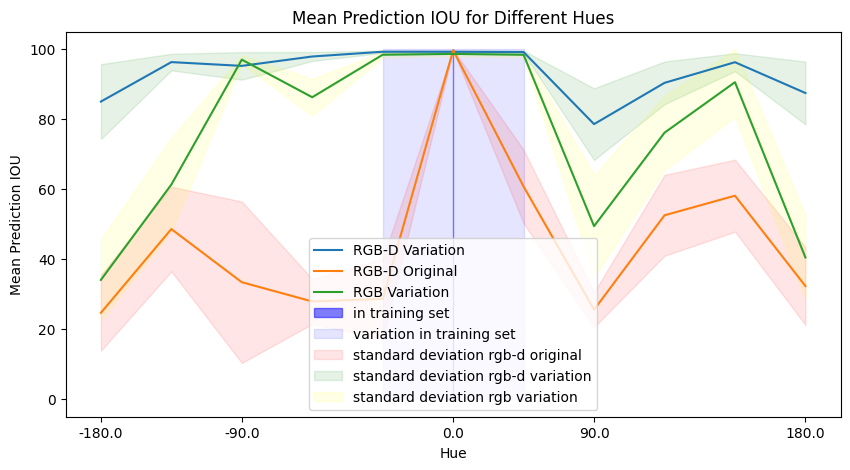

In [10]:
from result_analyzer import get_results_from_file
import numpy as np
import matplotlib.pyplot as plt

# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240505-204513_adjusted_hue_m01_01
hue_gems_rgbd_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240505-204513_adjusted_hue_m01_01"
# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240503-102810
hue_gems_rgbd_original = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240503-102810"
# code/UsefullnessOfDepth/checkpoints/SynthDet_rgb_DFormer-Tiny/run_20240505-212715_adjusted_hue_m01_01_rgb
hue_gems_rgb_variation = r"..\checkpoints\SynthDet_rgb_DFormer-Tiny\run_20240505-212715_adjusted_hue_m01_01_rgb"

miou_values_hue_gems_rgbd_variation, iou_std_values_hue_gems_rgbd_variation = get_results_from_file(hue_gems_rgbd_variation, results_file_name="hue_tests.txt")
miou_values_hue_gems_rgbd_original, iou_std_values_hue_gems_rgbd_original = get_results_from_file(hue_gems_rgbd_original, results_file_name="hue_tests.txt")
miou_values_hue_gems_rgb_variation, iou_std_values_hue_gems_rgb_variation = get_results_from_file(hue_gems_rgb_variation, results_file_name="hue_tests.txt")

miou_values_hue_gems_rgbd_variation = np.concatenate(np.array(miou_values_hue_gems_rgbd_variation))
iou_std_values_hue_gems_rgbd_variation = np.concatenate(np.array(iou_std_values_hue_gems_rgbd_variation))
miou_values_hue_gems_rgbd_original = np.concatenate(np.array(miou_values_hue_gems_rgbd_original))
iou_std_values_hue_gems_rgbd_original = np.concatenate(np.array(iou_std_values_hue_gems_rgbd_original))

miou_values_hue_gems_rgb_variation = np.concatenate(np.array(miou_values_hue_gems_rgb_variation))
iou_std_values_hue_gems_rgb_variation = np.concatenate(np.array(iou_std_values_hue_gems_rgb_variation))

x_label_degrees = np.linspace(-180, 180, 5)
x_labels = [str(x) for x in x_label_degrees]
plt.figure(figsize=(10, 5))
plt.plot(range(len(miou_values_hue_gems_rgbd_variation)), miou_values_hue_gems_rgbd_variation, label='RGB-D Variation')
plt.plot(range(len(miou_values_hue_gems_rgbd_original)), miou_values_hue_gems_rgbd_original, label='RGB-D Original')

plt.plot(range(len(miou_values_hue_gems_rgb_variation)), miou_values_hue_gems_rgb_variation, label='RGB Variation')


num_values = len(miou_values_hue_gems_rgbd_variation)
data_in_train_x_positions = np.array([0.0])
data_in_train_x_positions = (data_in_train_x_positions - (-0.5)) / (0.5- (-0.5)) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions[0], data_in_train_x_positions[0]],
    0, 100,
    color='blue', alpha=0.5, label='in training set')


data_in_train_x_positions_variation = np.array([-0.1, 0.1])
data_in_train_x_positions_variation = (data_in_train_x_positions_variation - (-0.5)) / (0.5- (-0.5)) * (num_values - 1)
plt.fill_between(
    [data_in_train_x_positions_variation[0], data_in_train_x_positions_variation[1]],
    0, 100,
    color='blue', alpha=0.1, label='variation in training set')

plt.fill_between(
    range(len(miou_values_hue_gems_rgbd_original)),
    np.maximum(np.array(miou_values_hue_gems_rgbd_original) - np.array(iou_std_values_hue_gems_rgbd_original), 0),
    np.minimum(np.array(miou_values_hue_gems_rgbd_original) + np.array(iou_std_values_hue_gems_rgbd_original), 100),
    color='red', alpha=0.1, label='standard deviation rgb-d original')

plt.fill_between(
    range(len(miou_values_hue_gems_rgbd_variation)),
    np.maximum(np.array(miou_values_hue_gems_rgbd_variation) - np.array(iou_std_values_hue_gems_rgbd_variation), 0),
    np.minimum(np.array(miou_values_hue_gems_rgbd_variation) + np.array(iou_std_values_hue_gems_rgbd_variation), 100),
    color='green', alpha=0.1, label='standard deviation rgb-d variation')

plt.fill_between(
    range(len(miou_values_hue_gems_rgb_variation)),
    np.maximum(np.array(miou_values_hue_gems_rgb_variation) - np.array(iou_std_values_hue_gems_rgb_variation), 0),
    np.minimum(np.array(miou_values_hue_gems_rgb_variation) + np.array(iou_std_values_hue_gems_rgb_variation), 100),
    color='yellow', alpha=0.1, label='standard deviation rgb variation')

plt.title("Mean Prediction IOU for Different Hues")
plt.xlabel("Hue")
plt.ylabel("Mean Prediction IOU")
plt.xticks(np.linspace(0, len(miou_values_hue_gems_rgbd_variation) -1, len(x_labels), dtype=int), x_labels)
plt.legend()
plt.show()

In [76]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib

def get_hue(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image from BGR to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Calculate the histogram
    hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])

    # Calculate the hue
    hue = np.argmax(hist)

    return hue

def get_images(dataset_path, split='test'):
    images = []
    paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.startswith(split)]
    paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    images = [cv2.imread(path) for path in paths]

    return images

def get_hue_values(dataset_path, split='test'):
    hue_values = []
    paths = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.startswith(split)]
    paths.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

    hue_values = [get_hue(path) for path in paths]

    return hue_values

def plot_hue_values(hue_values, title=""):
    font = {'family': 'sans-serif',
        'size'   : 12}

    matplotlib.rc('font', **font)

    plt.figure(figsize=(20, 10))
    plt.plot(hue_values, 'o', label='Hue values')
    min_hue = min(hue_values) - 10
    max_hue = max(hue_values) + 10
    plt.title("Hue values distribution of " + title + " dataset")
    plt.xlabel("Data point")
    plt.ylabel("Hue value")
    plt.legend()
    plt.show()

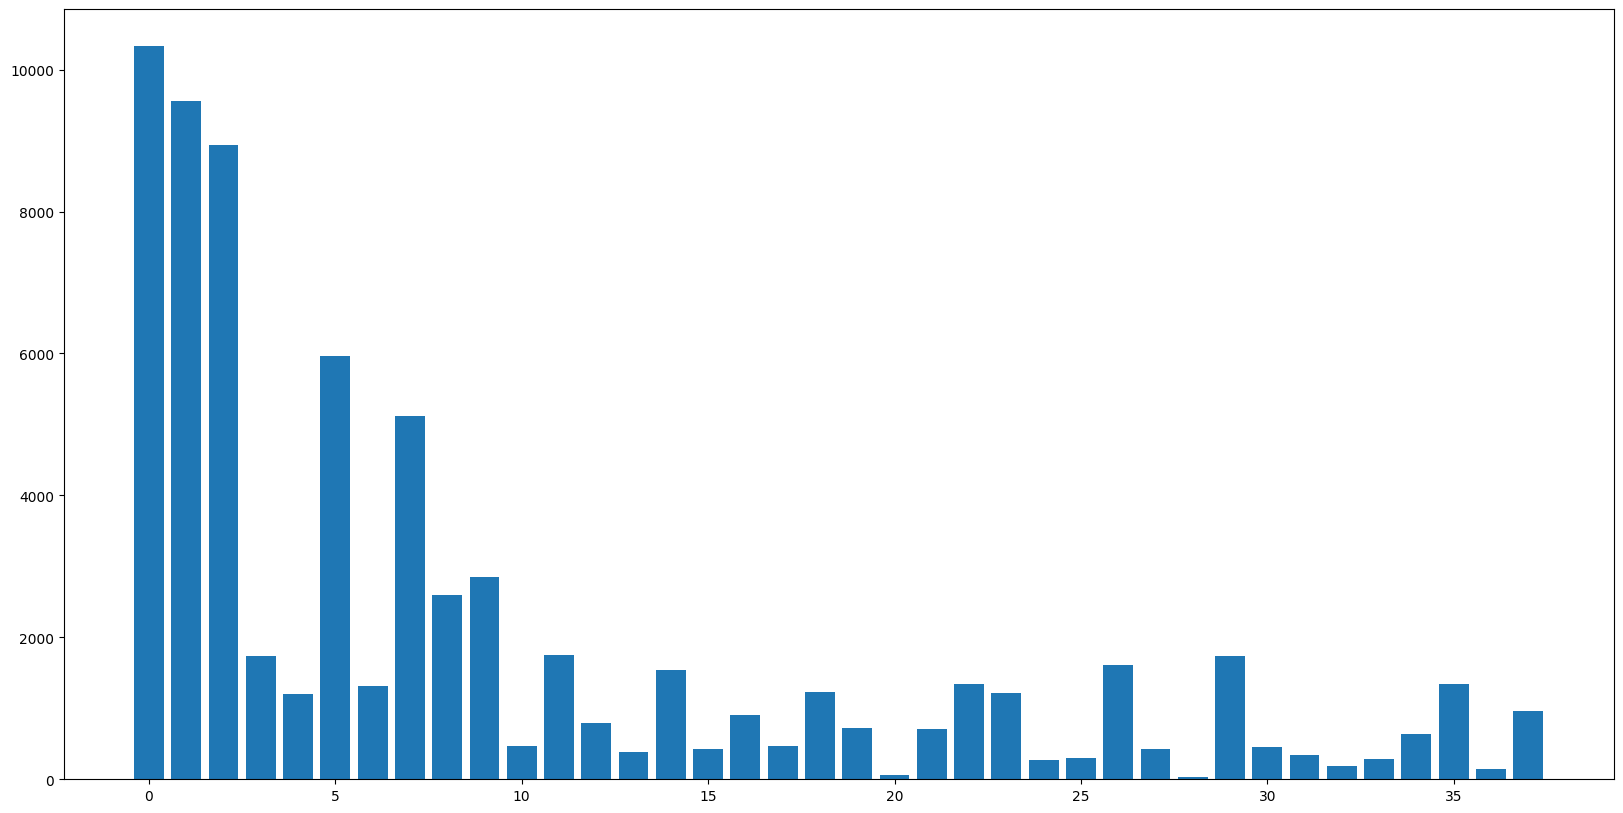

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

rgb_sunrgbd_path = r"..\datasets\SUNRGBD\RGB"
depth_sunrgbd_path = r"..\datasets\SUNRGBD\Depth"

label_files_location = r"..\datasets\SUNRGBD\labels"
label_files = [f for f in os.listdir(label_files_location) if f.endswith('.png')]

# classes = set([str(cv2.imread(os.path.join(label_files_location, f), cv2.IMREAD_GRAYSCALE).flatten().tolist()) for f in label_files])
classes = set(pixel for f in label_files for pixel in set(cv2.imread(os.path.join(label_files_location, f), cv2.IMREAD_GRAYSCALE).flatten().tolist()))
# hue_values = get_hue_values(original_sunrgbd_path)
classes

class_counts = {c: 0 for c in classes}
for f in label_files:
    img = cv2.imread(os.path.join(label_files_location, f), cv2.IMREAD_GRAYSCALE)
    for pixel in set(img.flatten().tolist()):
        class_counts[pixel] += 1

plt.figure(figsize=(20, 10))
plt.bar(class_counts.keys(), class_counts.values())
plt.show()

In [3]:
import pprint
pprint.pprint(class_counts)

{0: 10333,
 1: 9553,
 2: 8937,
 3: 1738,
 4: 1208,
 5: 5964,
 6: 1310,
 7: 5120,
 8: 2596,
 9: 2847,
 10: 463,
 11: 1755,
 12: 794,
 13: 391,
 14: 1546,
 15: 429,
 16: 903,
 17: 464,
 18: 1226,
 19: 716,
 20: 54,
 21: 707,
 22: 1346,
 23: 1217,
 24: 275,
 25: 296,
 26: 1611,
 27: 432,
 28: 30,
 29: 1734,
 30: 449,
 31: 349,
 32: 186,
 33: 283,
 34: 638,
 35: 1340,
 36: 145,
 37: 958}


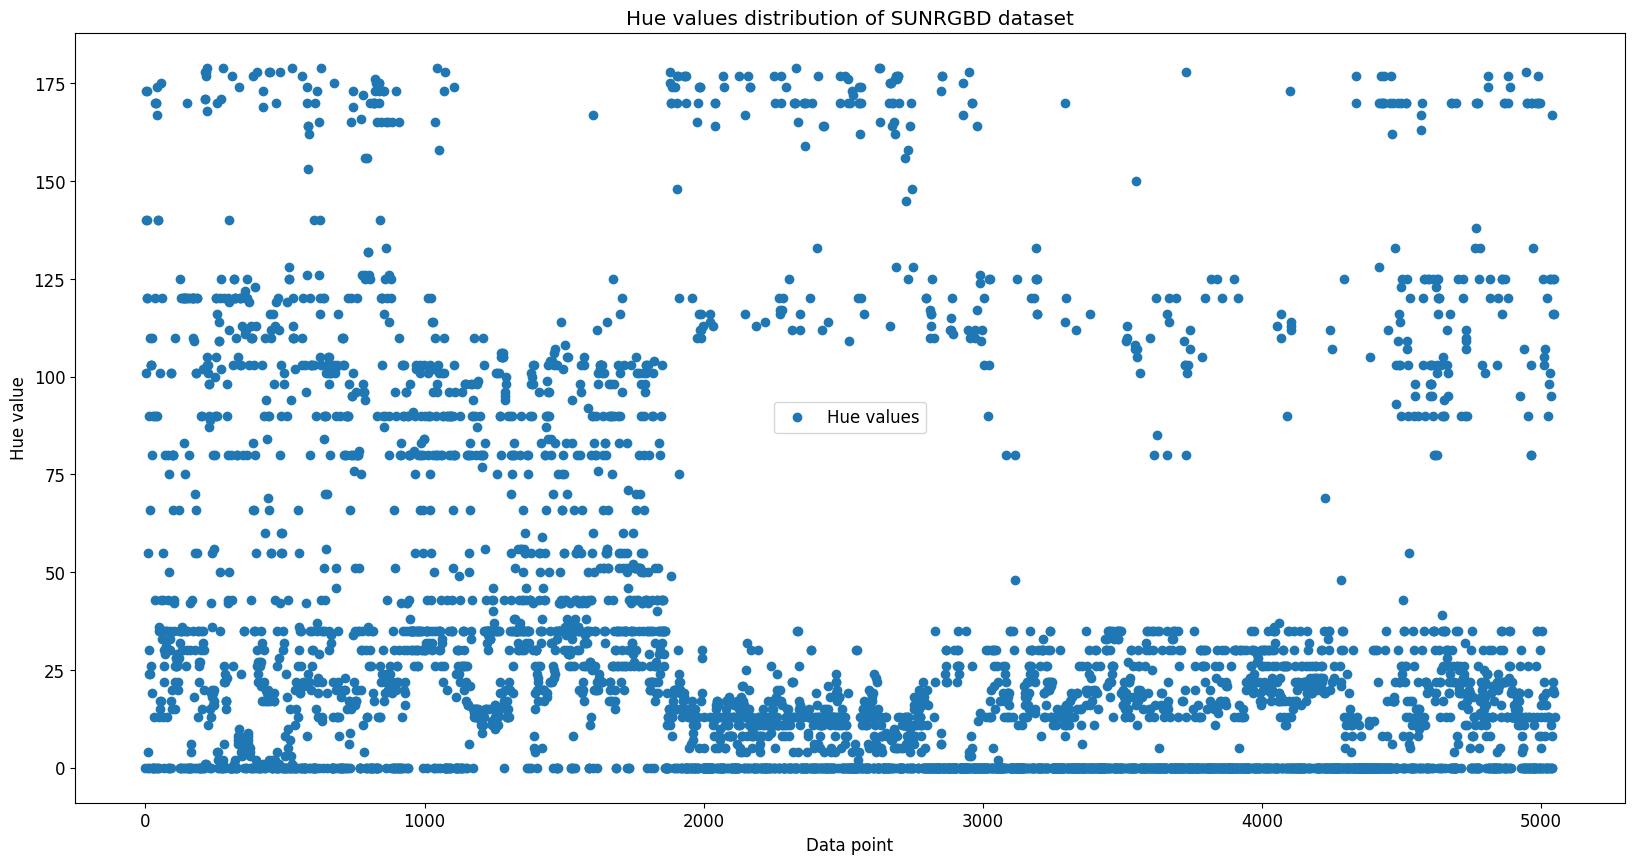

In [15]:
plot_hue_values(hue_values, "SUNRGBD")

In [79]:
def group_images_by_hue(images, hue_values):
    grouped_images = {'red': [], 'green': [], 'blue': [], 'gray': []}
    for i,image in enumerate(images):
        average_hue = hue_values[i]
        if average_hue < 10 or average_hue > 170:  # Red-ish
            grouped_images['red'].append(image)
        elif 40 < average_hue < 80:  # Green-ish
            grouped_images['green'].append(image)
        elif 90 < average_hue < 140:  # Blue-ish
            grouped_images['blue'].append(image)
        else:  # Gray-ish
            grouped_images['gray'].append(image)
    return grouped_images

images = get_images(original_sunrgbd_path)

# grouped_images = group_images_by_hue(images[:100], hue_values[:100])

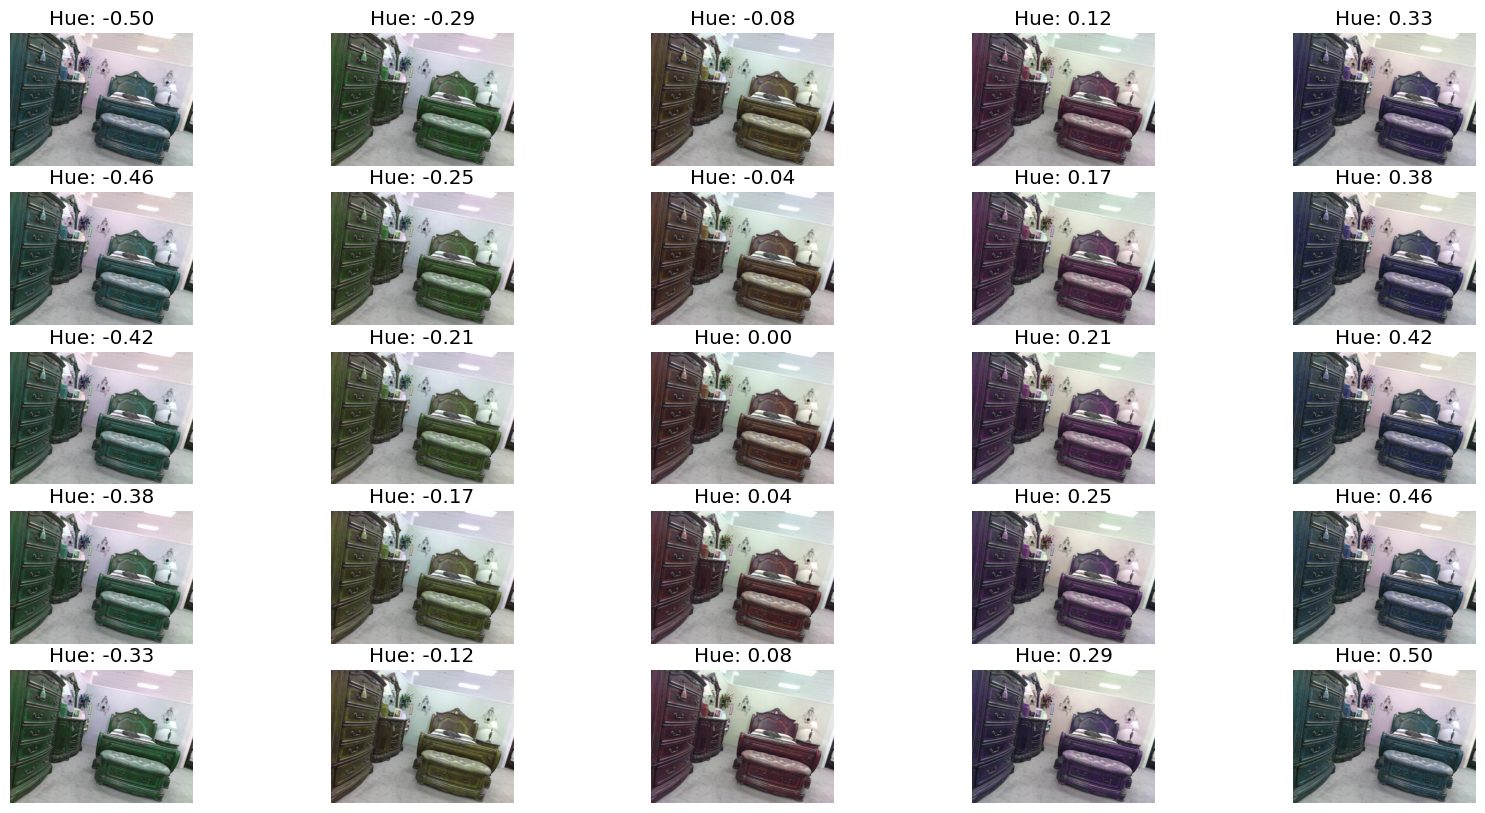

In [104]:
blue_color_bgr = np.array([255, 0, 0])
green_color_bgr = np.array([0, 255, 0])
red_color_bgr = np.array([0, 0, 255])

import matplotlib.pyplot as plt
import cv2
import numpy as np
import torchvision.transforms.functional as F

hue_min = -0.5
hue_max = 0.5
fig, ax = plt.subplots(5, 5, figsize=(20, 10))
for i in range(5):
    for j in range(5):
        tinted_image = images[0].copy()
        shape = tinted_image.shape
        blue_color_bgr_new = np.tile(blue_color_bgr, (shape[0], shape[1], 1))
        blue_color_bgr_new = blue_color_bgr_new.astype(np.uint8)
        # tinted_image = cv2.add(tinted_image, blue_color_bgr_new)
        # tinted_image = cv2.addWeighted(tinted_image, 0.8, blue_color_bgr_new, 0.2, 0)
        hue_value = (i+5*j) / 24 * (hue_max - hue_min) + hue_min
        tinted_image = F.adjust_hue(F.to_pil_image(tinted_image), hue_value)
        tinted_image = np.clip(tinted_image, 0, 255)
        ax[i, j].imshow(cv2.cvtColor(tinted_image, cv2.COLOR_BGR2RGB))
        ax[i, j].axis('off')
        ax[i, j].set_title(f'Hue: {hue_value:.2f}')
plt.show()


<Figure size 2000x1000 with 0 Axes>

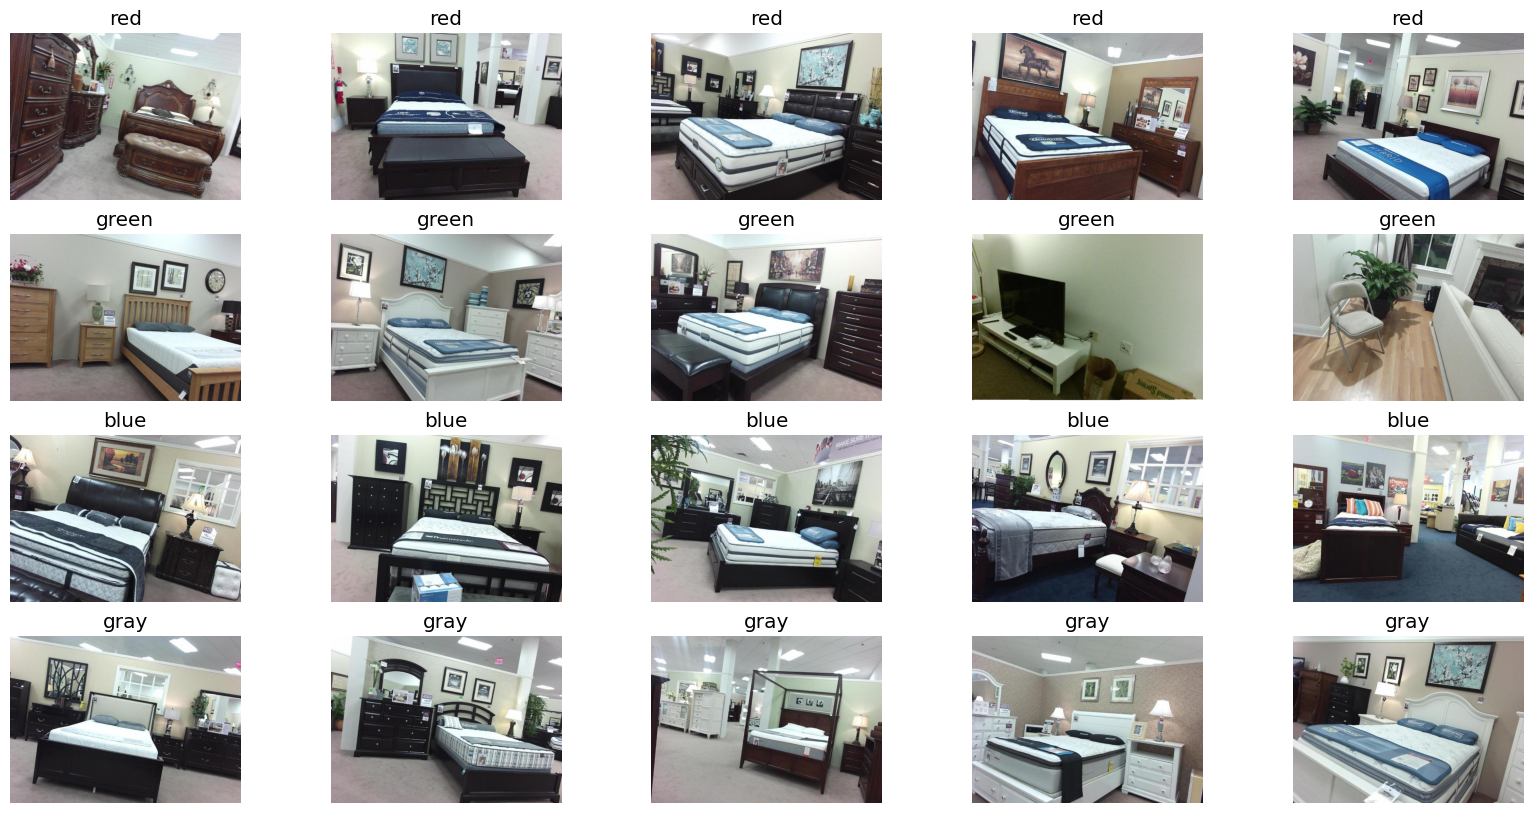

In [20]:
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(4, 5, figsize=(20, 10))
for i, (key, value) in enumerate(grouped_images.items()):
    for j, image in enumerate(value):
        if i >= 4 or j >= 5:
            break
        ax[i, j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[i, j].set_title(key)
        ax[i, j].axis('off')

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

<Figure size 2000x1000 with 0 Axes>

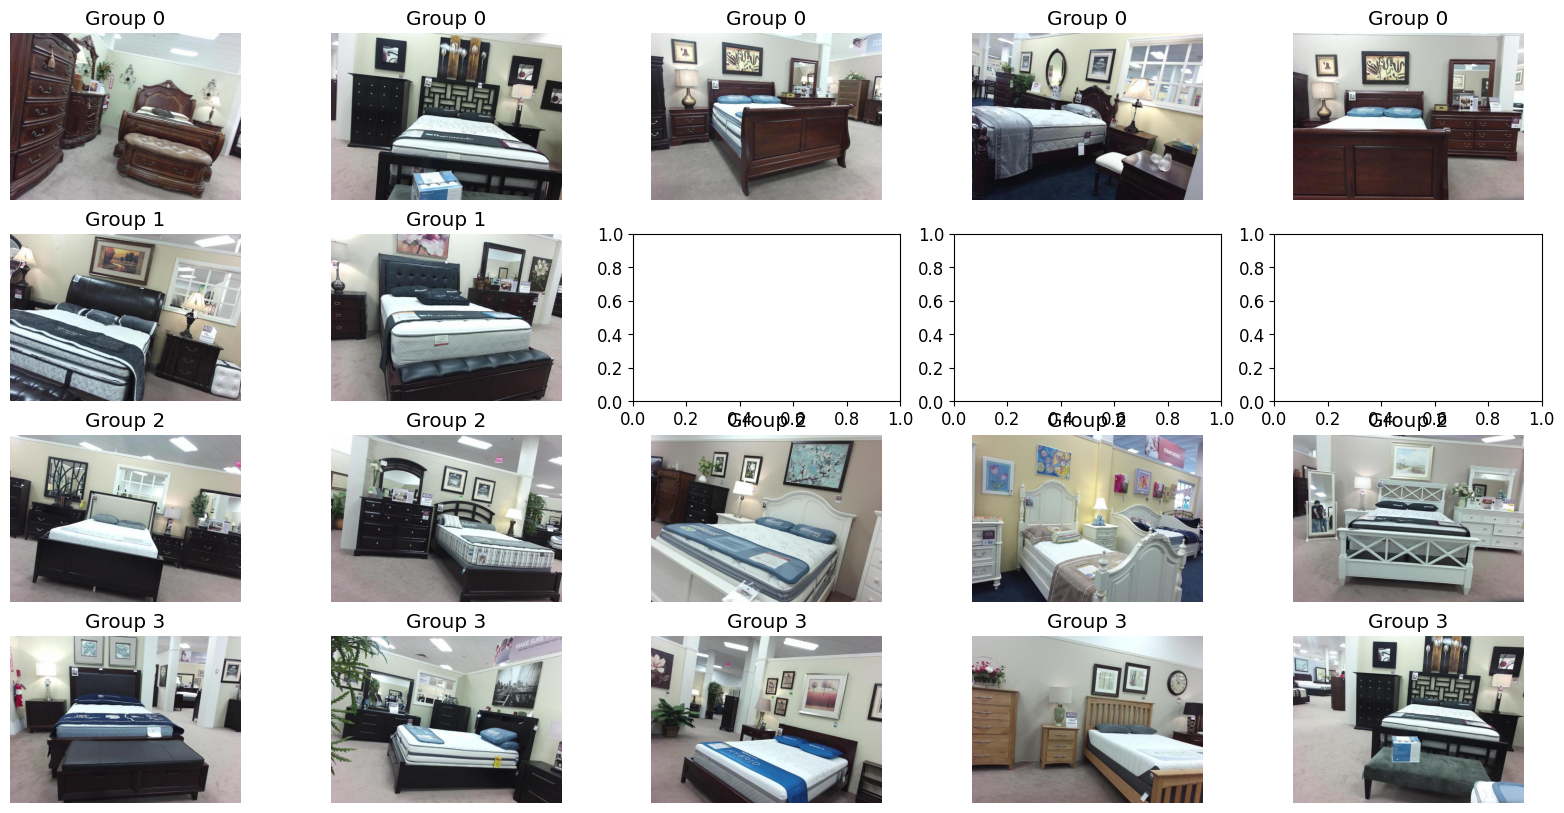

In [22]:
def get_dominant_color(image, k=3):
    # Reshape the image
    pixels = image.reshape(-1, 3)
    
    # Convert to float32
    pixels = np.float32(pixels)
    
    # Define criteria and apply K-Means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centroids = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to uint8
    centroids = np.uint8(centroids)
    
    # Find the dominant color (cluster centroid with the largest number of associated pixels)
    unique, counts = np.unique(labels, return_counts=True)
    dominant_cluster = centroids[np.argmax(counts)]
    
    # Return the dominant color
    return dominant_cluster

def calculate_color_similarity(color1, color2, metric='euclidean'):
    if metric == 'euclidean':
        return np.linalg.norm(color1 - color2)
    # Add more similarity metrics here if needed
    else:
        raise ValueError("Unsupported similarity metric")

def group_dominant_colors(dominant_colors, threshold=50):
    color_groups = []
    grouped_indices = set()
    
    for i, color in enumerate(dominant_colors):
        if i not in grouped_indices:
            group = [i]
            for j, other_color in enumerate(dominant_colors):
                if j not in grouped_indices and i != j:
                    similarity = calculate_color_similarity(color, other_color)
                    if similarity < threshold:
                        group.append(j)
                        grouped_indices.add(j)
            color_groups.append(group)
    
    return color_groups


dominant_colors = [get_dominant_color(image) for image in images[:100]]
color_groups = group_dominant_colors(dominant_colors)

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(4, 5, figsize=(20, 10))

for i, group in enumerate(color_groups):
    for j, index in enumerate(group):
        if i >= 4 or j >= 5:
            break
        ax[i, j].imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
        ax[i, j].set_title("Group " + str(i))
        ax[i, j].axis('off')

plt.show()

In [50]:
colors = {
    "dark_green": [0, 100, 0],
    "light_green": [144, 238, 144],
    "dark_red": [139, 0, 0],
    "light_red": [255, 99, 71],
    "dark_blue": [0, 0, 139],
    "light_blue": [135, 206, 250],
    "dark_yellow": [139, 139, 0],
    "light_yellow": [255, 255, 224],
    "dark_orange": [255, 140, 0],
    "light_orange": [255, 165, 0],
    "dark_purple": [128, 0, 128],
    "light_purple": [147, 112, 219],
    "dark_pink": [199, 21, 133],
    "light_pink": [255, 182, 193],
    "dark_brown": [139, 69, 19],
    "light_brown": [210, 105, 30],
    "dark_gray": [105, 105, 105],
    "light_gray": [211, 211, 211]
}

# Create sprite images for each group, for unity texture
import os
import cv2
import numpy as np

os.makedirs("sprites", exist_ok=True)

for key, value in colors.items():
    sprite_image = np.zeros((256, 256, 3), dtype=np.uint8) + value[::-1]
    cv2.imwrite(os.path.join("sprites", key + ".png"), sprite_image)





NameError: name 'get_results_2' is not defined

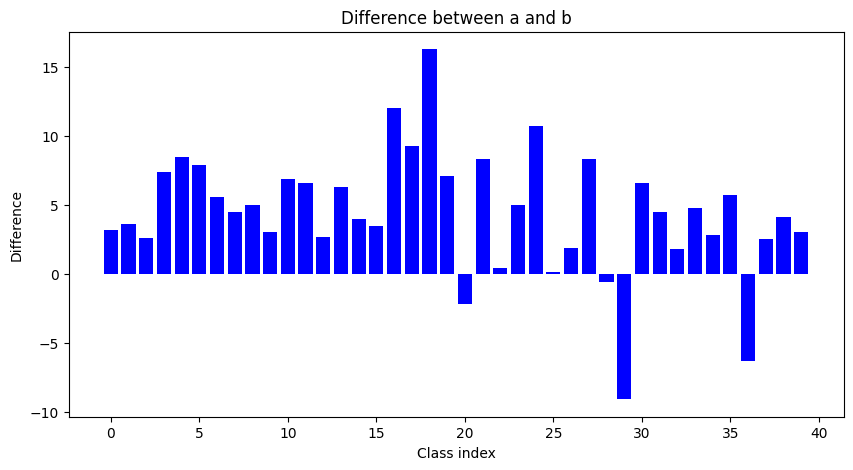

Class 20 has a difference of -2.1999999999999993
Class 28 has a difference of -0.5999999999999996
Class 29 has a difference of -9.100000000000009
Class 36 has a difference of -6.300000000000001


In [10]:
a =[79.6, 84.0, 58.4, 70.6, 61.9, 64.6, 47.0, 40.9, 51.0, 43.7, 61.6, 63.3, 61.0, 24.0, 20.7, 56.0, 53.2, 43.0, 56.8, 37.6, 20.1, 71.5, 32.3, 59.0, 56.0, 30.0, 36.0, 46.4, 12.1, 60.3, 71.6, 40.1, 70.7, 55.8, 41.3, 35.6, 7.1, 30.5, 18.5, 38.3]
b = [76.4, 80.4, 55.8, 63.2, 53.4, 56.7, 41.4, 36.4, 46.0, 40.7, 54.7, 56.7, 58.3, 17.7, 16.7, 52.5, 41.2, 33.7, 40.5, 30.5, 22.3, 63.2, 31.9, 54.0, 45.3, 29.9, 34.1, 38.1, 12.7, 69.4, 65.0, 35.6, 68.9, 51.0, 38.5, 29.9, 13.4, 28.0, 14.4, 35.3]

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# Plot the difference between a and b as a bar chart where negative values are below the x-axis
plt.bar(range(len(a)), np.array(a) - np.array(b), color='blue')
plt.title("Difference between a and b")
plt.xlabel("Class index")
plt.ylabel("Difference")

plt.show()

# print classes where the difference is lower than 0
for i, (a_val, b_val) in enumerate(zip(a, b)):
    if a_val - b_val < 0:
        print(f"Class {i} has a difference of {a_val - b_val}")


654


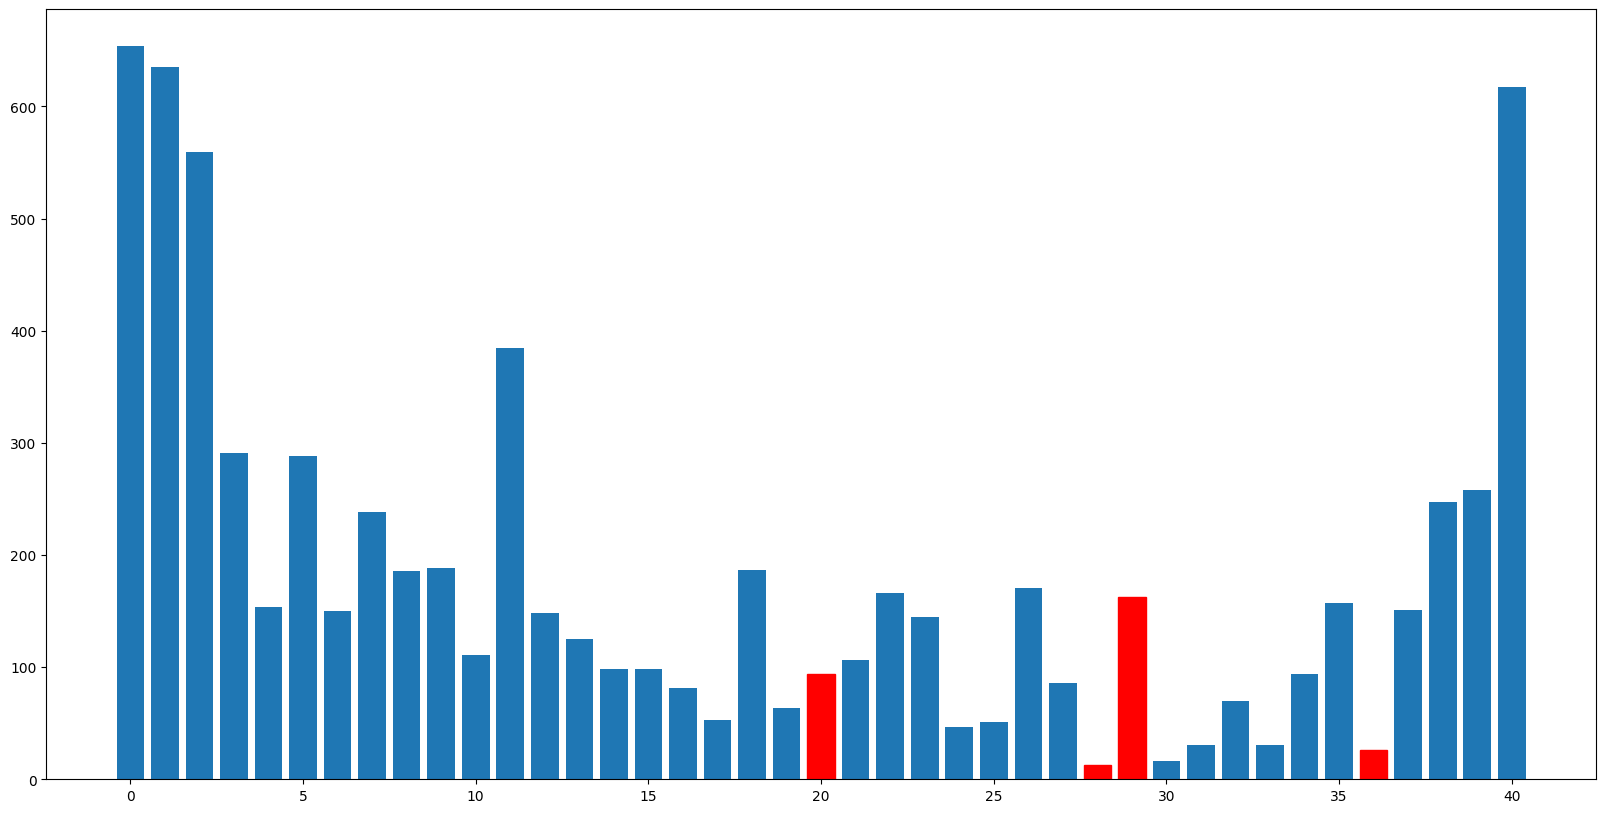

In [9]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

label_files_location = r"..\datasets\NYUDepthv2\Label"
label_file_test = r"..\datasets\NYUDepthv2\test.txt"
with open(label_file_test, 'r') as f:
    label_file_names = f.readlines()
    # RGB/0.jpg	Label/0.png
    # Remove RGB/ and Label/ and \n
    label_file_names = [f.split('\t')[1][6:-1] for f in label_file_names]

label_files = [f for f in os.listdir(label_files_location) if f in label_file_names]
print(len(label_files))

highlighted_classes = [20, 28, 29, 36]

# classes = set([str(cv2.imread(os.path.join(label_files_location, f), cv2.IMREAD_GRAYSCALE).flatten().tolist()) for f in label_files])
classes = set(pixel for f in label_files for pixel in set(cv2.imread(os.path.join(label_files_location, f), cv2.IMREAD_GRAYSCALE).flatten().tolist()))
# hue_values = get_hue_values(original_sunrgbd_path)
classes

class_counts = {c: 0 for c in classes}
for f in label_files:
    img = cv2.imread(os.path.join(label_files_location, f), cv2.IMREAD_GRAYSCALE)
    for pixel in set(img.flatten().tolist()):
        class_counts[pixel] += 1



plt.figure(figsize=(20, 10))
bars = plt.bar(class_counts.keys(), class_counts.values())
for i, bar in enumerate(bars):
    if i in highlighted_classes:
        bar.set_color('red')
plt.show()

In [11]:
class_names = ['bg', 'wall','floor','cabinet','bed','chair','sofa','table','door','window','bookshelf','picture','counter','blinds',
    'desk','shelves','curtain','dresser','pillow','mirror','floor mat','clothes','ceiling','books','refridgerator',
    'television','paper','towel','shower curtain','box','whiteboard','person','night stand','toilet',
    'sink','lamp','bathtub','bag','otherstructure','otherfurniture','otherprop']

print("Highlighted classes:")
for i in highlighted_classes:
    print(class_names[i])

Highlighted classes:
floor mat
shower curtain
box
bathtub
